In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (Optional) Improve DataFrame display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# File paths - update if necessary
agent_file = "Agent.xlsx"
mapping_file = "Mapping.xlsx"
stocklist_file = "Stocklist.xlsx"
tenancy_file = "Tenancy.xlsx"

# Load each Excel file into DataFrames
df_agent = pd.read_excel(agent_file)
df_mapping = pd.read_excel(mapping_file)
df_stocklist = pd.read_excel(stocklist_file)
df_tenancy = pd.read_excel(tenancy_file)

# Print shapes to confirm loading
print("Data Loaded:")
print(f" - Agent: {df_agent.shape}")
print(f" - Mapping: {df_mapping.shape}")
print(f" - Stocklist (Main): {df_stocklist.shape}")
print(f" - Tenancy: {df_tenancy.shape}")


Data Loaded:
 - Agent: (3965, 12)
 - Mapping: (83, 6)
 - Stocklist (Main): (5596, 26)
 - Tenancy: (3254, 9)


In [155]:
print("Agent Columns:")
print(df_agent.columns.tolist())

print("\nMapping Columns:")
print(df_mapping.columns.tolist())

print("\nStocklist Columns:")
print(df_stocklist.columns.tolist())

print("\nTenancy Columns:")
print(df_tenancy.columns.tolist())

# Example of renaming (adjust as needed):
df_agent.rename(columns={"Gas Cetificate Expiry": "Gas Certificate Expiry"}, inplace=True)


Agent Columns:
['COB Date', 'Site-ID', 'Property-ID', 'Gas Cetificate Expiry', 'EPC Ratings', 'EICR Expiry', 'PAT Expiry', 'Occupancy Status', 'Current ERV', 'Achieved Rent PCM', 'Vacant date', 'EPC Expiry Date']

Mapping Columns:
['Date', 'Site-ID', 'Name', 'Managing Agent', 'Head of Region', 'Status']

Stocklist Columns:
['COB', 'Property-ID', 'Site-ID', 'Status1-(Completed/Under Construction)', 'Status2-(Mobilising/Stabilised)', 'Postcode', 'Plot Number', 'Size Sqft', 'Number of Bedrooms', 'Total Number of Bathrooms', 'Number of Receptions', 'Property Type (Apartment/House)', 'Property Style', 'Garage', 'Car Park Space', 'Year of Build', 'Handover Date', 'EPC Rating', 'Solar Panels', 'Developer', 'Region', 'Status3-(Freehold/Leasehold)', 'Furnished', 'EV Charger', 'Gas', 'Target Handover Date']

Tenancy Columns:
['COB Date', 'Property-ID', 'Tenancy Start Date', 'Achieved Rent', 'Rent change', 'Next rent review date', 'Rent review', 'Rent Renewal increase', 'Previous Achieved Rent']


In [157]:
def standardize_yes_no(value):
    """
    Standardize yes/no values.
    Returns 'Yes' if value indicates yes, 'No' if indicates no, else returns the original value.
    """
    if isinstance(value, str):
        val = value.strip().lower()
        if val in ['y', 'yes']:
            return 'Yes'
        elif val in ['n', 'no']:
            return 'No'
    return value

# Apply this function on columns that are known to contain yes/no responses.
# For example, if Stocklist has a column "Solar Panels" and "EV Charger":
if 'Solar Panels' in df_stocklist.columns:
    df_stocklist['Solar Panels'] = df_stocklist['Solar Panels'].apply(standardize_yes_no)
if 'EV Charger' in df_stocklist.columns:
    df_stocklist['EV Charger'] = df_stocklist['EV Charger'].apply(standardize_yes_no)

# Similarly, apply to any other columns in other DataFrames as needed.


In [136]:
def standardize_yes_no(value):
    """
    Standardize yes/no values: converts common variants to 'Yes' or 'No'.
    """
    if isinstance(value, str):
        v = value.strip().lower()
        if v in ['y', 'yes']:
            return 'Yes'
        elif v in ['n', 'no']:
            return 'No'
    return value

# List the columns you want to standardize in the Stocklist DataFrame.
columns_to_standardize = ["Solar Panels", "Furnished", "EV Charger", "Gas"]

for col in columns_to_standardize:
    if col in df_stocklist.columns:
        df_stocklist[col] = df_stocklist[col].apply(standardize_yes_no)

# Verify the standardization by printing unique values for each column
for col in columns_to_standardize:
    if col in df_stocklist.columns:
        print(f"{col} unique values:", df_stocklist[col].unique())


Solar Panels unique values: ['No' 'Yes' nan 'Communal (Y)']
Furnished unique values: ['No' nan 'Yes' 'TBC']
EV Charger unique values: [nan 'No' 'Yes' '0' '1']
Gas unique values: ['Yes' 'No' nan]


In [159]:
# Merge Mapping data into Stocklist based on "Site-ID"
df_merged = pd.merge(
    df_stocklist,
    df_mapping,
    on="Site-ID",
    how="left",
    suffixes=('', '_mapping')
)

# Merge Agent data into the merged DataFrame using both "Property-ID" and "Site-ID"
df_merged = pd.merge(
    df_merged,
    df_agent,
    on=["Property-ID", "Site-ID"],
    how="left",
    suffixes=('', '_agent')
)

# Merge Tenancy data using "Property-ID"
df_merged = pd.merge(
    df_merged,
    df_tenancy,
    on="Property-ID",
    how="left",
    suffixes=('', '_tenancy')
)

print("Merged DataFrame shape:", df_merged.shape)


Merged DataFrame shape: (5596, 49)


Missing Values per Column (Before Handling):
PAT Expiry                                5569
Rent review                               5425
Rent Renewal increase                     4323
Previous Achieved Rent                    4152
Furnished                                 3659
Target Handover Date                      3416
Next rent review date                     3186
EV Charger                                3166
Gas Certificate Expiry                    2745
Rent change                               2491
Tenancy Start Date                        2344
Achieved Rent                             2342
COB Date_tenancy                          2342
EPC Ratings                               2219
EPC Expiry Date                           2048
Garage                                    2031
EICR Expiry                               2001
Achieved Rent PCM                         1874
Handover Date                             1862
Vacant date                               1856
Solar Panels   

/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/3032703140.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts_pre.index, y=missing_counts_pre.values, palette="viridis")


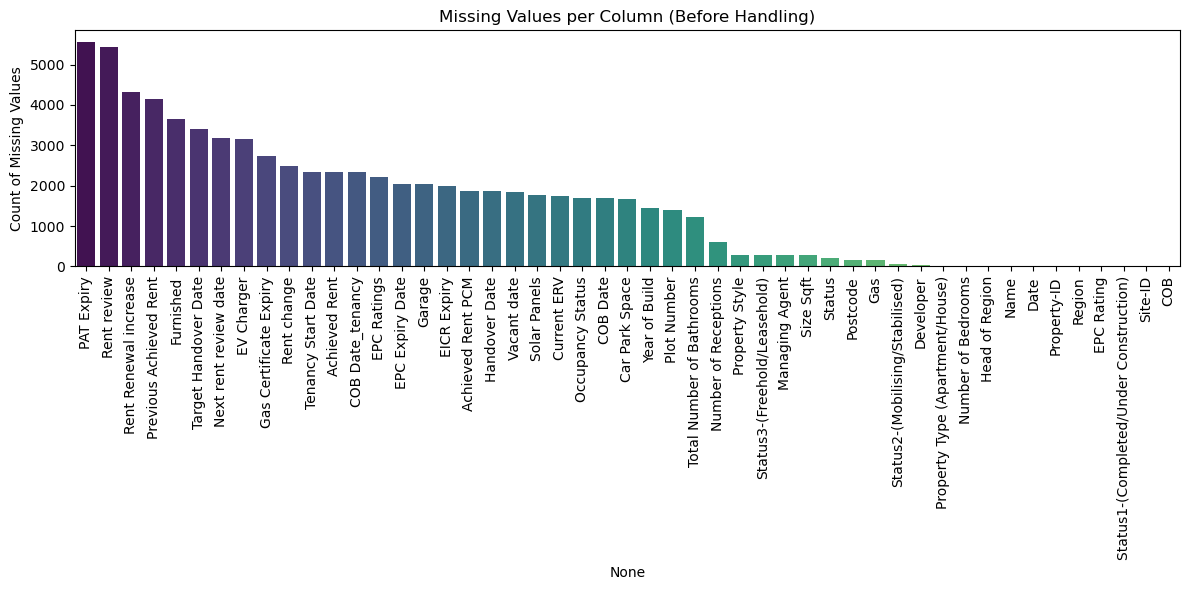

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_merged is the merged DataFrame before handling missing values
# If you've already handled missing values, you may need to reload df_merged from an earlier step.

# Calculate missing value counts per column (before handling)
missing_counts_pre = df_merged.isnull().sum().sort_values(ascending=False)

print("Missing Values per Column (Before Handling):")
print(missing_counts_pre)

# Plot the missing values per column
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts_pre.index, y=missing_counts_pre.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Count of Missing Values")
plt.title("Missing Values per Column (Before Handling)")
plt.tight_layout()
plt.show()



In [163]:
# List of date columns (adjust based on your merged DataFrame)
date_columns = [
    "PAT Expiry", "Target Handover Date", "Next rent review date", 
    "Gas Certificate Expiry", "Tenancy Start Date", "COB Date_tenancy", 
    "EPC Expiry Date", "EICR Expiry", "Handover Date", "Vacant date", "COB Date"
]

# Convert to datetime (if not already) and optionally fill missing values
for col in date_columns:
    if col in df_merged.columns:
        df_merged[col] = pd.to_datetime(df_merged[col], errors="coerce")
        # Option: Uncomment the line below to fill missing dates with a default (e.g., January 1, 1900)
        # df_merged[col].fillna(pd.Timestamp("1900-01-01"), inplace=True)

print("Date columns processed. Example:")
print(df_merged[date_columns].head())


Date columns processed. Example:
  PAT Expiry Target Handover Date Next rent review date Gas Certificate Expiry Tenancy Start Date COB Date_tenancy EPC Expiry Date EICR Expiry Handover Date Vacant date   COB Date
0        NaT                  NaT            2027-07-31             2025-07-05         2024-07-31       2025-01-31      2034-04-11  2029-04-04    2024-04-26  2024-04-26 2025-01-31
1        NaT                  NaT            2027-07-20             2025-07-05         2024-07-20       2025-01-31      2034-04-11         NaT    2024-04-26  2024-04-26 2025-01-31
2        NaT                  NaT            2027-05-23             2025-07-05         2024-05-23       2025-01-31      2034-04-11  2029-04-04    2024-04-26  2024-04-26 2025-01-31
3        NaT                  NaT            2027-07-31             2025-07-05         2024-07-31       2025-01-31      2034-04-09         NaT    2024-04-26  2024-04-26 2025-01-31
4        NaT                  NaT            2027-08-17            

/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/3735634081.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_merged[col] = pd.to_datetime(df_merged[col], errors="coerce")


In [165]:
# List of numeric columns (update as needed based on your dataset)
numeric_columns = [
    "Rent Renewal increase", "Previous Achieved Rent", "Achieved Rent", 
    "Achieved Rent PCM", "Current ERV", "Car Park Space", "Year of Build", 
    "Size Sqft", "Total Number of Bathrooms", "Number of Receptions", 
    "Number of Bedrooms"
]

for col in numeric_columns:
    if col in df_merged.columns:
        median_val = df_merged[col].median()
        df_merged[col].fillna(median_val, inplace=True)

print("Numeric columns missing values filled. Example:")
print(df_merged[numeric_columns].head())


Numeric columns missing values filled. Example:
   Rent Renewal increase  Previous Achieved Rent  Achieved Rent  Achieved Rent PCM  Current ERV  Car Park Space  Year of Build  Size Sqft  Total Number of Bathrooms  Number of Receptions  Number of Bedrooms
0                    0.0                     0.0         1050.0             1050.0       1125.0             1.0         2024.0     1016.0                        2.0                   1.0                 3.0
1                    0.0                     0.0         1050.0             1050.0       1125.0             1.0         2024.0     1016.0                        2.0                   1.0                 3.0
2                    0.0                     0.0         1200.0             1200.0       1125.0             1.0         2024.0     1016.0                        2.0                   1.0                 3.0
3                    0.0                     0.0         1050.0             1050.0       1125.0             2.0         2024

/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/493698005.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[col].fillna(median_val, inplace=True)


In [167]:
# List of categorical columns (adjust as necessary)
categorical_columns = [
    "Rent review", "Furnished", "EV Charger", "Occupancy Status", 
    "Property Type (Apartment/House)", "Property Style", 
    "Status3-(Freehold/Leasehold)", "Managing Agent", "Status", 
    "Postcode", "Developer"
]

for col in categorical_columns:
    if col in df_merged.columns:
        if not df_merged[col].mode().empty:
            mode_val = df_merged[col].mode()[0]
            df_merged[col].fillna(mode_val, inplace=True)
        else:
            df_merged[col].fillna("Unknown", inplace=True)

print("Categorical columns missing values filled. Example:")
print(df_merged[categorical_columns].head())


Categorical columns missing values filled. Example:
   Rent review Furnished EV Charger Occupancy Status Property Type (Apartment/House)                     Property Style Status3-(Freehold/Leasehold) Managing Agent      Status Postcode    Developer
0       1050.0         N         No         Occupied                           House   3 St. Town House, Semi-Detached                      Freehold        Agent 3  Stabilised     CV10  Developer A
1       1050.0         N         No         Occupied                           House   3 St. Town House, Semi-Detached                      Freehold        Agent 3  Stabilised     CV10  Developer A
2       1050.0         N         No         Occupied                           House   3 St. Town House, Semi-Detached                      Freehold        Agent 3  Stabilised     CV10  Developer A
3       1050.0         N         No         Occupied                           House  3 St. Town House, End of Terrace                      Freehold        

/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/2740187535.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[col].fillna(mode_val, inplace=True)


In [169]:
# Example for a column that might need special handling: "Rent change"
if "Rent change" in df_merged.columns:
    # For example, if "Rent change" should be numeric, fill missing with 0.
    # Adjust based on your understanding of the data.
    df_merged["Rent change"].fillna(0, inplace=True)

print("Special column handling for 'Rent change':")
print(df_merged["Rent change"].head())


Special column handling for 'Rent change':
0    N
1    N
2    N
3    N
4    N
Name: Rent change, dtype: object


/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/4029153006.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["Rent change"].fillna(0, inplace=True)


In [173]:
# Choose a default date (adjust as needed)
default_date = pd.Timestamp("1900-01-01")

# List of date columns you want to fill (update if you have more)
date_columns_to_fill = [
    "Handover Date", "Target Handover Date", "Vacant date", 
    "Gas Certificate Expiry", "EPC Ratings", "EICR Expiry", "PAT Expiry",
    "COB Date", "COB Date_tenancy", "Tenancy Start Date", "Next rent review date",
    "EPC Expiry Date"
]

for col in date_columns_to_fill:
    if col in df_merged.columns:
        # Ensure the column is in datetime format
        df_merged[col] = pd.to_datetime(df_merged[col], errors="coerce")
        # Fill missing values with the default date
        df_merged[col].fillna(default_date, inplace=True)

print("After filling date columns, missing values:")
print(df_merged[date_columns_to_fill].isnull().sum())


After filling date columns, missing values:
Handover Date             0
Target Handover Date      0
Vacant date               0
Gas Certificate Expiry    0
EPC Ratings               0
EICR Expiry               0
PAT Expiry                0
COB Date                  0
COB Date_tenancy          0
Tenancy Start Date        0
Next rent review date     0
EPC Expiry Date           0
dtype: int64


/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/441609371.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[col].fillna(default_date, inplace=True)
/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/441609371.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [175]:
# For "Plot Number": if a missing plot number means “not assigned”, you might use -1
if "Plot Number" in df_merged.columns:
    df_merged["Plot Number"].fillna(-1, inplace=True)

# For "Garage": if missing means there is no garage, you might fill with 0
if "Garage" in df_merged.columns:
    df_merged["Garage"].fillna(0, inplace=True)

print("After handling numeric columns:")
print("Plot Number missing:", df_merged["Plot Number"].isnull().sum())
print("Garage missing:", df_merged["Garage"].isnull().sum())


After handling numeric columns:
Plot Number missing: 0
Garage missing: 0


/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/781607231.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["Plot Number"].fillna(-1, inplace=True)
/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/781607231.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [177]:
# For a specific categorical column
if "Status2-(Mobilising/Stabilised)" in df_merged.columns:
    mode_val = df_merged["Status2-(Mobilising/Stabilised)"].mode()[0]
    df_merged["Status2-(Mobilising/Stabilised)"].fillna(mode_val, inplace=True)

print("After handling categorical column 'Status2-(Mobilising/Stabilised)':")
print(df_merged["Status2-(Mobilising/Stabilised)"].isnull().sum())


After handling categorical column 'Status2-(Mobilising/Stabilised)':
0


/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/1884777013.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["Status2-(Mobilising/Stabilised)"].fillna(mode_val, inplace=True)


In [181]:
# For "Solar Panels": Assume missing means "No"
if "Solar Panels" in df_merged.columns:
    df_merged.loc[:, "Solar Panels"] = df_merged["Solar Panels"].fillna("No")
    print("After handling, Solar Panels missing:", df_merged["Solar Panels"].isnull().sum())

# For "Gas": Assume missing means "No"
if "Gas" in df_merged.columns:
    df_merged.loc[:, "Gas"] = df_merged["Gas"].fillna("No")
    print("After handling, Gas missing:", df_merged["Gas"].isnull().sum())


After handling, Solar Panels missing: 0
After handling, Gas missing: 0


In [183]:
print("Final missing values summary:")
print(df_merged.isnull().sum())

Final missing values summary:
COB                                       0
Property-ID                               0
Site-ID                                   0
Status1-(Completed/Under Construction)    0
Status2-(Mobilising/Stabilised)           0
Postcode                                  0
Plot Number                               0
Size Sqft                                 0
Number of Bedrooms                        0
Total Number of Bathrooms                 0
Number of Receptions                      0
Property Type (Apartment/House)           0
Property Style                            0
Garage                                    0
Car Park Space                            0
Year of Build                             0
Handover Date                             0
EPC Rating                                0
Solar Panels                              0
Developer                                 0
Region                                    0
Status3-(Freehold/Leasehold)              0
Fu

In [226]:
import pandas as pd
import numpy as np

def standardize_yes_no(value, colname=None):
    """
    Standardizes any value that represents a yes/no response.
    Converts:
      - Numeric 1 (or "1") and text variants ("y", "yes") to "Yes"
      - Numeric 0 (or "0") and text variants ("n", "no") to "No"
      - For "Garage": converts "no garage" (any case) to "No"
      - Handles specific variants like "TBC" or "Communal (Y)" as needed.
    """
    # Handle missing values first
    if pd.isnull(value):
        return value

    # Try to interpret numeric values
    try:
        num = float(value)
        if num == 1:
            return "Yes"
        elif num == 0:
            return "No"
    except (ValueError, TypeError):
        pass

    # Process as a string: convert to lowercase and strip spaces
    if isinstance(value, str):
        v = value.strip().lower()
        # Special case for "Garage": if value equals "no garage", return "No"
        if colname == "Garage" and v == "no garage":
            return "No"
        # Standard text variants
        if v in ["y", "yes"]:
            return "Yes"
        elif v in ["n", "no"]:
            return "No"
        # Specific adjustments
        elif v == "tbc":
            return "No"  # or "Unknown" if preferred
        elif "communal" in v and "y" in v:
            return "Yes"
    return value

# List of columns to standardize for yes/no responses.
# This now includes "Solar Panels", "Furnished", "EV Charger", "Gas", "Garage", and "Rent change".
yes_no_columns = ["Solar Panels", "Furnished", "EV Charger", "Gas", "Garage", "Rent change"]

# Apply the standardization function to each of the yes/no columns in the merged DataFrame.
for col in yes_no_columns:
    if col in df_merged.columns:
        df_merged[col] = df_merged[col].apply(lambda x: standardize_yes_no(x, colname=col))

# Verify the changes by printing unique values for each column.
for col in yes_no_columns:
    if col in df_merged.columns:
        print(f"{col} unique values:", df_merged[col].unique())


Solar Panels unique values: ['No' 'Yes']
Furnished unique values: ['No' 'Yes']
EV Charger unique values: ['No' 'Yes']
Gas unique values: ['Yes' 'No']
Garage unique values: ['Yes' 'No' 'Car Port' 'Integral Single' 'Detached Single'
 'Integral Garage']
Rent change unique values: ['No' 'Yes']


In [228]:
# Display the first 5 rows of the merged DataFrame
print(df_merged.head(2))


         COB  Property-ID  Site-ID Status1-(Completed/Under Construction) Status2-(Mobilising/Stabilised) Postcode  Plot Number  Size Sqft  Number of Bedrooms  Total Number of Bathrooms  Number of Receptions Property Type (Apartment/House)                    Property Style Garage  Car Park Space  Year of Build Handover Date EPC Rating Solar Panels    Developer         Region Status3-(Freehold/Leasehold) Furnished EV Charger  Gas Target Handover Date       Date              Name Managing Agent Head of Region      Status   COB Date Gas Certificate Expiry EPC Ratings EICR Expiry PAT Expiry Occupancy Status  Current ERV  Achieved Rent PCM Vacant date EPC Expiry Date COB Date_tenancy Tenancy Start Date  Achieved Rent Rent change Next rent review date  Rent review  Rent Renewal increase  Previous Achieved Rent
0 2025-01-31            1        1                              Completed                      Mobilising     CV10         54.0     1016.0                 3.0                        2.

Data loaded. Shape: (5596, 49)
          COB  Property-ID  Site-ID Status1-(Completed/Under Construction) Status2-(Mobilising/Stabilised) Postcode  Plot Number  Size Sqft  Number of Bedrooms  Total Number of Bathrooms  Number of Receptions Property Type (Apartment/House)                     Property Style Garage  Car Park Space  Year of Build Handover Date EPC Rating Solar Panels    Developer         Region Status3-(Freehold/Leasehold) Furnished EV Charger  Gas Target Handover Date        Date              Name Managing Agent Head of Region      Status    COB Date Gas Certificate Expiry EPC Ratings EICR Expiry  PAT Expiry Occupancy Status  Current ERV  Achieved Rent PCM Vacant date EPC Expiry Date COB Date_tenancy Tenancy Start Date  Achieved Rent Rent change Next rent review date  Rent review  Rent Renewal increase  Previous Achieved Rent
0  2025-01-31            1        1                              Completed                      Mobilising     CV10         54.0     1016.0         

/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/3436693469.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  region_plot = sns.countplot(data=df, x='Region', palette="viridis", order=df['Region'].value_counts().index)


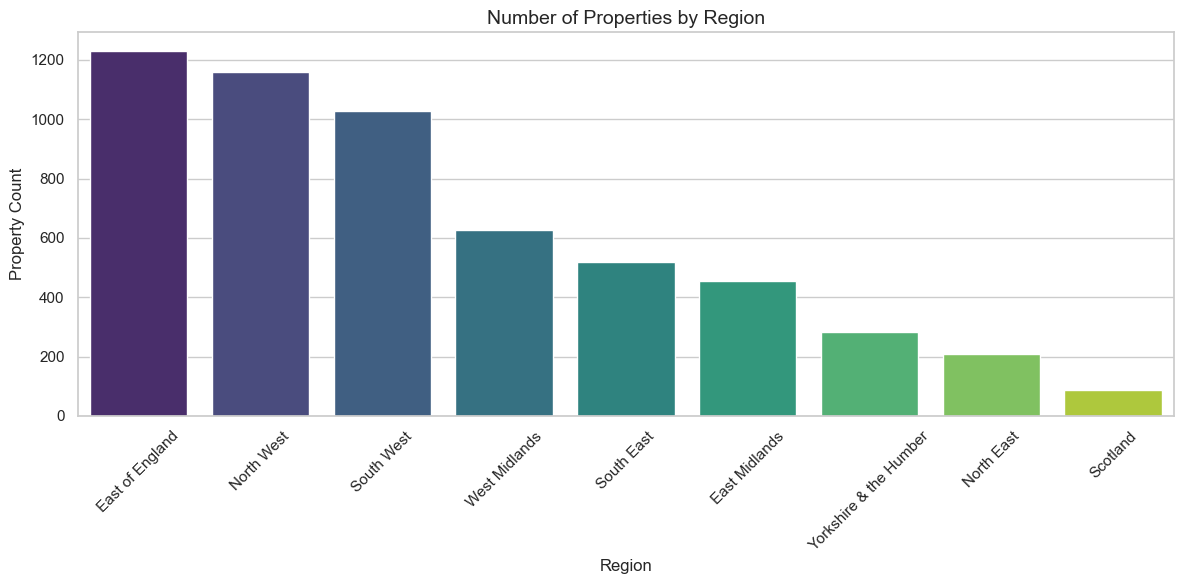

/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/3436693469.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  property_type_plot = sns.countplot(data=df, x='Property Type (Apartment/House)', palette="magma")


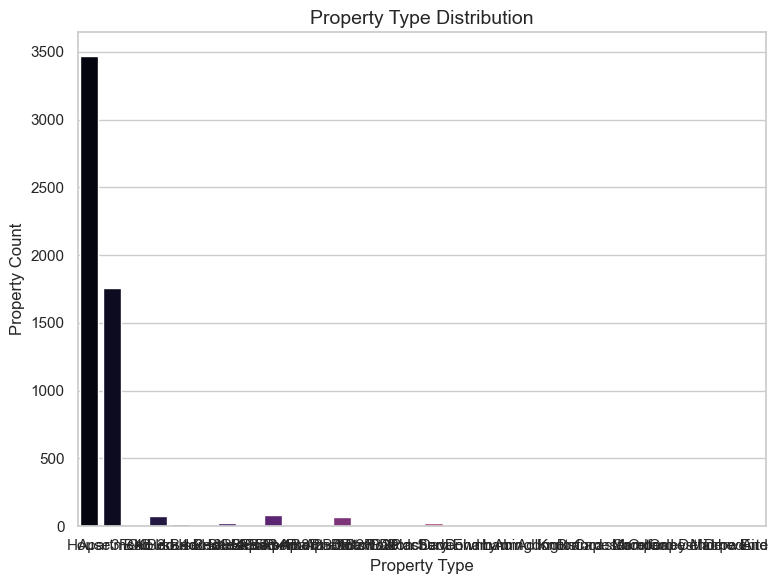

/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/3436693469.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  developer_plot = sns.countplot(data=df, x='Developer', palette="coolwarm", order=df['Developer'].value_counts().index)


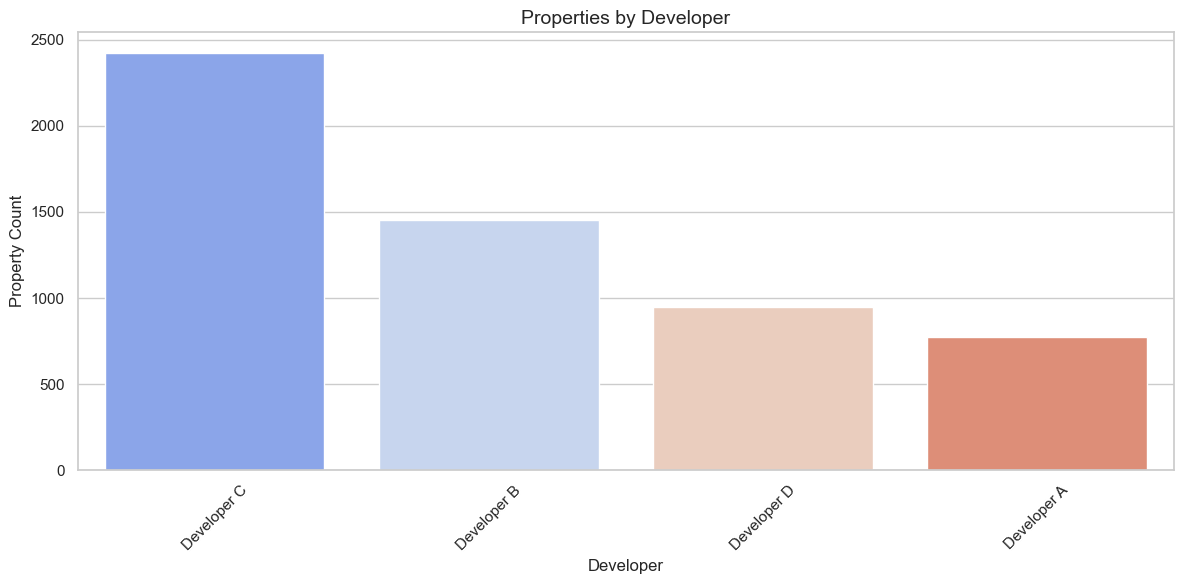

/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/3436693469.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  rent_plot = sns.barplot(data=rent_by_region, x="Region", y="Achieved Rent PCM", palette="coolwarm",


Occupancy Rate: 84.65%


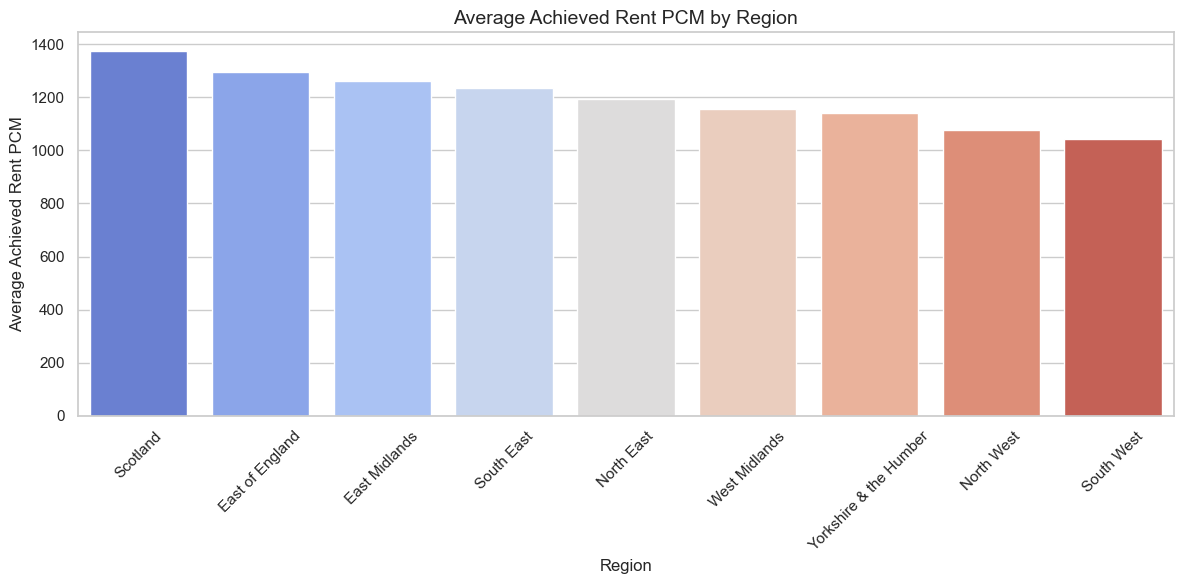

Data Quality Issues - Missing Values per Column:
Series([], dtype: int64)


In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")

# ================================
# Step 1: Load the Cleaned Data
# ================================
# Load your final cleaned merged data (version 2)
df = pd.read_csv("LloydsLiving_CleanedData_Final.csv")

# Display basic info
print("Data loaded. Shape:", df.shape)
print(df.head())

# ================================
# Step 2: Analysis - Portfolio Characteristics
# ================================

# (a) Distribution of properties by Region
plt.figure(figsize=(12, 6))
region_plot = sns.countplot(data=df, x='Region', palette="viridis", order=df['Region'].value_counts().index)
plt.title("Number of Properties by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Property Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (b) Distribution of Property Type (Apartment/House)
plt.figure(figsize=(8, 6))
property_type_plot = sns.countplot(data=df, x='Property Type (Apartment/House)', palette="magma")
plt.title("Property Type Distribution", fontsize=14)
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Property Count", fontsize=12)
plt.tight_layout()
plt.show()

# You might also explore additional portfolio characteristics such as Developer or Property Style if needed.
# For example, distribution by Developer:
plt.figure(figsize=(12, 6))
developer_plot = sns.countplot(data=df, x='Developer', palette="coolwarm", order=df['Developer'].value_counts().index)
plt.title("Properties by Developer", fontsize=14)
plt.xlabel("Developer", fontsize=12)
plt.ylabel("Property Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# Step 3: Analysis - Letting Metrics
# ================================

# (a) Calculate Occupancy Rate:
# Assuming "Occupancy Status" has values like "Occupied" for properties that are let.
if 'Occupancy Status' in df.columns:
    # Count properties where occupancy status is "Occupied" (ignoring case) 
    occupancy_rate = (df['Occupancy Status'].str.lower() == "occupied").mean() * 100
    print("Occupancy Rate: {:.2f}%".format(occupancy_rate))
else:
    print("Occupancy Status column not found.")

# (b) Average Achieved Rent PCM by Region:
# Group by region and calculate the mean Achieved Rent PCM
if 'Achieved Rent PCM' in df.columns:
    rent_by_region = df.groupby("Region")["Achieved Rent PCM"].mean().reset_index()
    plt.figure(figsize=(12, 6))
    rent_plot = sns.barplot(data=rent_by_region, x="Region", y="Achieved Rent PCM", palette="coolwarm", 
                            order=rent_by_region.sort_values("Achieved Rent PCM", ascending=False)["Region"])
    plt.title("Average Achieved Rent PCM by Region", fontsize=14)
    plt.xlabel("Region", fontsize=12)
    plt.ylabel("Average Achieved Rent PCM", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Achieved Rent PCM column not found.")

# ================================
# Step 4: Data Quality Issues Summary (for PowerPoint slide)
# ================================
# Calculate missing values per column to highlight data quality issues
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print("Data Quality Issues - Missing Values per Column:")
print(missing_counts)

# ================================
# Step 5: (Optional) Save Visualizations
# ================================
# If you want to save the charts to image files, you can use plt.savefig() in place of plt.show()
# For example:
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df, x='Region', palette="viridis", order=df['Region'].value_counts().index)
# plt.title("Number of Properties by Region", fontsize=14)
# plt.xlabel("Region", fontsize=12)
# plt.ylabel("Property Count", fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig("properties_by_region.png", dpi=300)
# plt.close()



In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a plotting style
sns.set(style="whitegrid")

# Load the final cleaned merged dataset (adjust file name if necessary)
df = pd.read_csv("LloydsLiving_CleanedData_Final.csv")

print("Data loaded. Shape:", df.shape)
print(df.head())



Data loaded. Shape: (5596, 49)
          COB  Property-ID  Site-ID Status1-(Completed/Under Construction) Status2-(Mobilising/Stabilised) Postcode  Plot Number  Size Sqft  Number of Bedrooms  Total Number of Bathrooms  Number of Receptions Property Type (Apartment/House)                     Property Style Garage  Car Park Space  Year of Build Handover Date EPC Rating Solar Panels    Developer         Region Status3-(Freehold/Leasehold) Furnished EV Charger  Gas Target Handover Date        Date              Name Managing Agent Head of Region      Status    COB Date Gas Certificate Expiry EPC Ratings EICR Expiry  PAT Expiry Occupancy Status  Current ERV  Achieved Rent PCM Vacant date EPC Expiry Date COB Date_tenancy Tenancy Start Date  Achieved Rent Rent change Next rent review date  Rent review  Rent Renewal increase  Previous Achieved Rent
0  2025-01-31            1        1                              Completed                      Mobilising     CV10         54.0     1016.0         

/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/1935160176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  region_plot = sns.countplot(data=df, x='Region', palette="viridis",


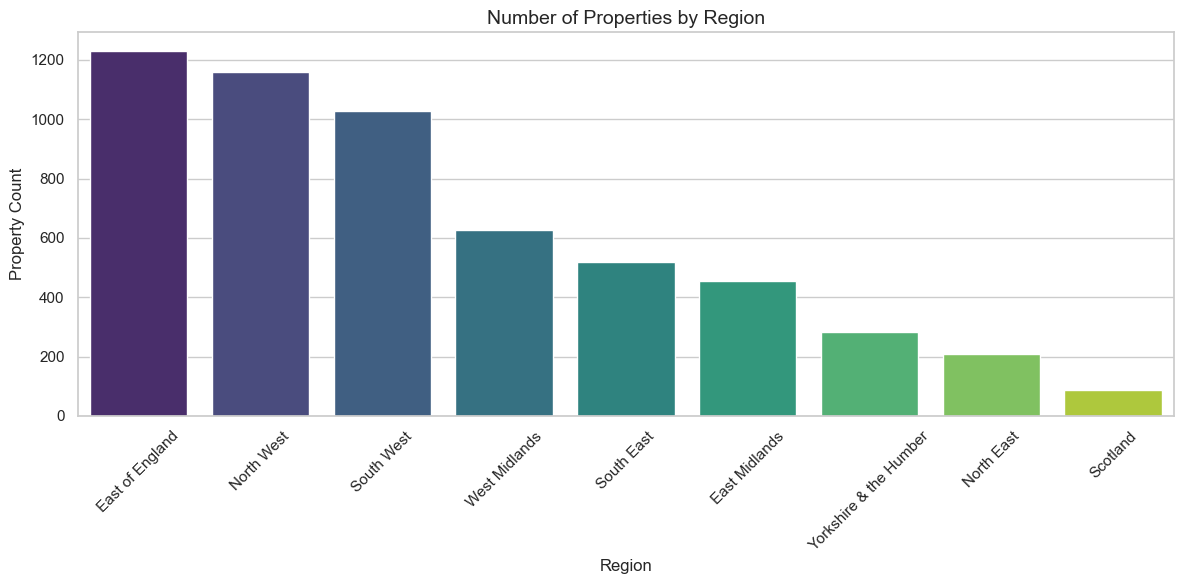

In [240]:
plt.figure(figsize=(12, 6))
region_plot = sns.countplot(data=df, x='Region', palette="viridis",
                            order=df['Region'].value_counts().index)
plt.title("Number of Properties by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Property Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/823618904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  developer_plot = sns.countplot(data=df, x='Developer', palette="coolwarm",


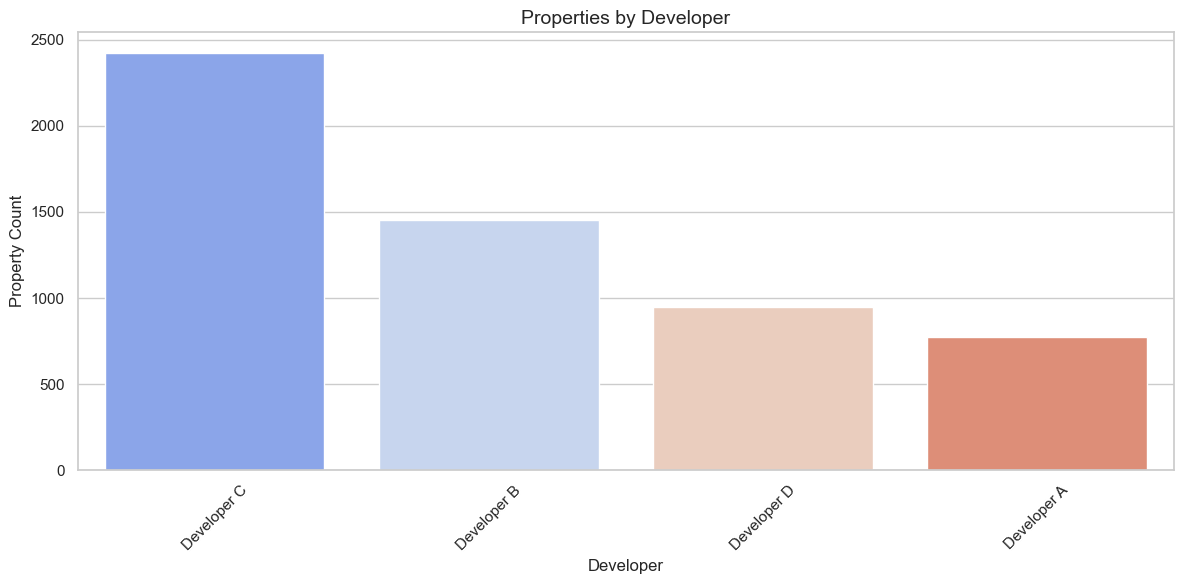

In [244]:
plt.figure(figsize=(12, 6))
developer_plot = sns.countplot(data=df, x='Developer', palette="coolwarm",
                               order=df['Developer'].value_counts().index)
plt.title("Properties by Developer", fontsize=14)
plt.xlabel("Developer", fontsize=12)
plt.ylabel("Property Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [246]:
if 'Occupancy Status' in df.columns:
    # Calculate occupancy rate as percentage of properties labeled "Occupied"
    occupancy_rate = (df['Occupancy Status'].str.lower() == "occupied").mean() * 100
    print("Occupancy Rate: {:.2f}%".format(occupancy_rate))
else:
    print("Occupancy Status column not found.")


Occupancy Rate: 84.65%


/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/2500599660.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  rent_plot = sns.barplot(data=rent_by_region, x="Region", y="Achieved Rent PCM", palette="coolwarm",


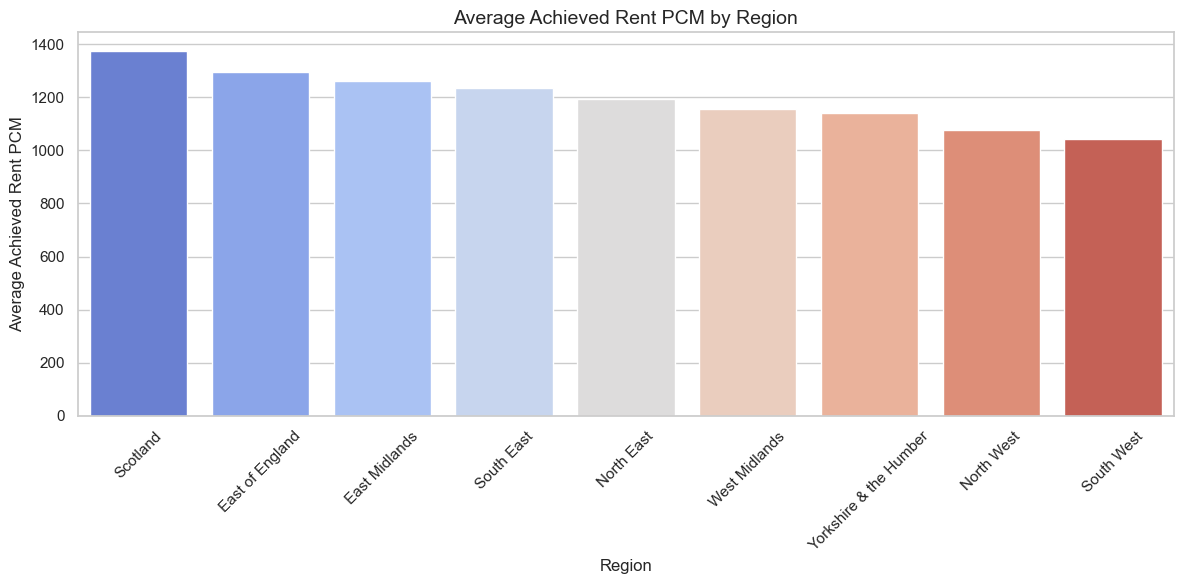

In [248]:
if 'Achieved Rent PCM' in df.columns:
    rent_by_region = df.groupby("Region")["Achieved Rent PCM"].mean().reset_index()
    plt.figure(figsize=(12, 6))
    rent_plot = sns.barplot(data=rent_by_region, x="Region", y="Achieved Rent PCM", palette="coolwarm",
                            order=rent_by_region.sort_values("Achieved Rent PCM", ascending=False)["Region"])
    plt.title("Average Achieved Rent PCM by Region", fontsize=14)
    plt.xlabel("Region", fontsize=12)
    plt.ylabel("Average Achieved Rent PCM", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Achieved Rent PCM column not found.")


/var/folders/vc/z90cv9cs7jzfrfkk8xf6n0kc0000gn/T/ipykernel_45884/843960741.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


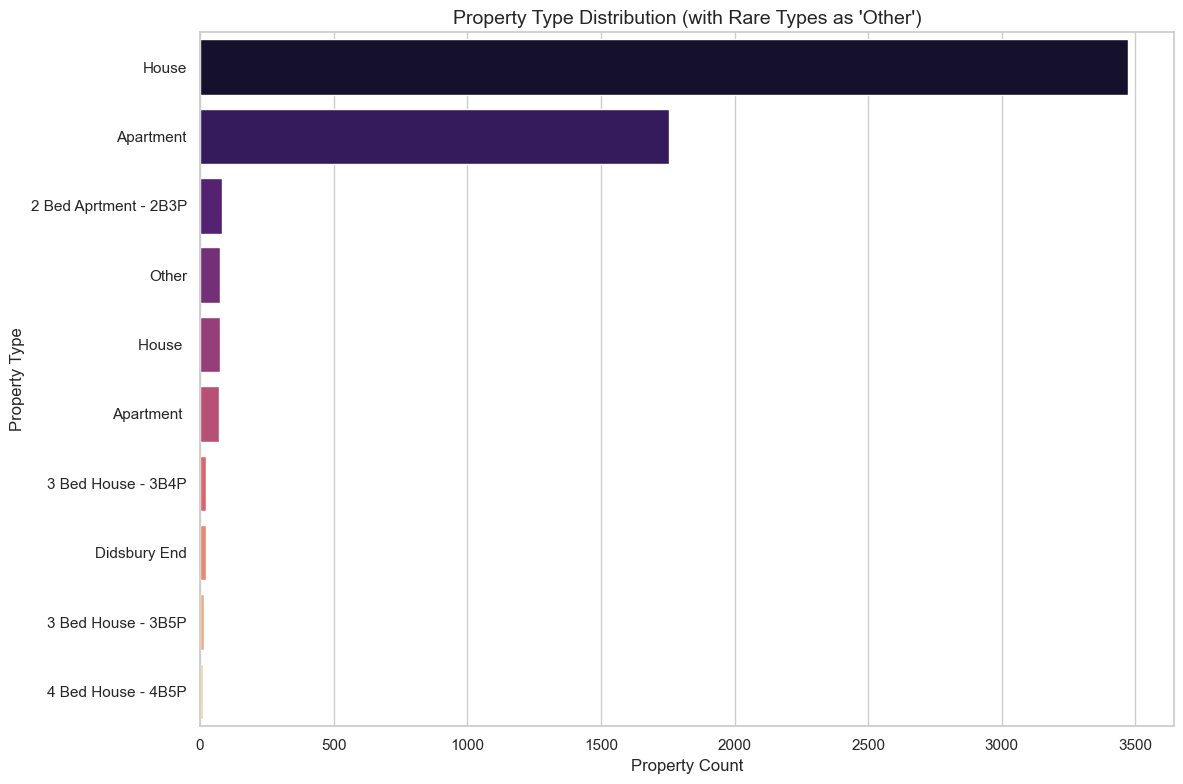

In [252]:
# Combine categories with fewer than 10 properties into "Other"
counts = df['Property Type (Apartment/House)'].value_counts()
threshold = 10  # or any cutoff you choose
rare_types = counts[counts < threshold].index

df['Property Type (Apartment/House)'] = df['Property Type (Apartment/House)'].replace(rare_types, 'Other')

# Now plot again
plt.figure(figsize=(12, 8))
sns.countplot(
    data=df, 
    y='Property Type (Apartment/House)',
    palette="magma",
    order=df['Property Type (Apartment/House)'].value_counts().index
)
plt.title("Property Type Distribution (with Rare Types as 'Other')", fontsize=14)
plt.ylabel("Property Type", fontsize=12)
plt.xlabel("Property Count", fontsize=12)
plt.tight_layout()
plt.show()


In [230]:
output_file = "LloydsLiving_CleanedData_Final.csv"
df_merged.to_csv(output_file, index=False)
print("Cleaned & merged dataset saved to:", output_file)


Cleaned & merged dataset saved to: LloydsLiving_CleanedData_Final.csv
